In [1]:
import numpy as np
import pandas as pd
import tweepy
import json
from tweepy import OAuthHandler

In [2]:
consumer_key = "LzsCOl12ZZ79FObx7BV9a1R3a"
consumer_secret = "gODxZ1kHJHDGgYfyP12AUN37UTlDd6yn3OsSV9Tl0iwu0K0cRY"
access_token = "296102538-kYIK8SULCmRK4vgvYD2DhKbwvSXrgTdTkWh0Nvsp"
access_token_secret = "Ib9obwgcE5tZk4S6tY5rAqI5iXOeJc9FGFg28qHoa4YpP"

In [3]:
auth = tweepy.OAuthHandler( consumer_key , consumer_secret )
auth.set_access_token( access_token , access_token_secret )
api = tweepy.API(auth)

In [4]:
Tweets = api.search( "Mumbai Indians will win IPL" , count=10 , lang='en' , exclude='retweets' , tweet_mode='extended' )
for tweet in Tweets:
    print(tweet,"\n")
    print(".....................................\n")

Status(_api=<tweepy.api.API object at 0x000001FA05E56700>, _json={'created_at': 'Mon Apr 05 07:59:29 +0000 2021', 'id': 1378980599092834308, 'id_str': '1378980599092834308', 'full_text': '@TrendzAndDeals @Contest_in @ContestAlertIn1 @contestVshare @GiveawayGoat @IPL @mipaltan @RCBTweets MUMBAI INDIANS will win the TOSS and decide to Bowl first \n\n#MI #RCB\n#IPLwithTAD\n@TrendzAndDeals \n\n@godsowntalk\n@O__DayaL\n@gurgaon_rangers\n@ShainaArora1\n@coolkishore59\n@Mr_YashG\n@KpParmar98\n@p_sinha123\n@sanjudhy\n@SrinathAkula369\n@Man1shRox\n@khushboo_khetan\n@SaddamMolla0071', 'truncated': False, 'display_text_range': [100, 373], 'entities': {'hashtags': [{'text': 'MI', 'indices': [160, 163]}, {'text': 'RCB', 'indices': [164, 168]}, {'text': 'IPLwithTAD', 'indices': [169, 180]}], 'symbols': [], 'user_mentions': [{'screen_name': 'TrendzAndDeals', 'name': 'Trends and Deals', 'id': 1150275613715906560, 'id_str': '1150275613715906560', 'indices': [0, 15]}, {'screen_name': 'Contest_in', 'name

In [5]:
df = pd.DataFrame(columns = ['Tweets' , 'User' , 'User_statuses_count' , 
                            'User_followers' , 'User_location' , 'User_verified' ,
                            'fav_count' , 'rt_count' , 'tweet_date'] )
print(df)

Empty DataFrame
Columns: [Tweets, User, User_statuses_count, User_followers, User_location, User_verified, fav_count, rt_count, tweet_date]
Index: []


In [6]:
# function to fetch data using tweepy.Cursor and store the data (Max=1000 records)
def stream(data, file_name):
    i = 0
    for tweet in tweepy.Cursor(api.search, q=data, count=100, exclude='retweets', lang='en').items():
        print('Tweets:',i, end='\r')
        df.loc[i, 'Tweets'] = tweet.text
        df.loc[i, 'User'] = tweet.user.name
        df.loc[i, 'User_statuses_count'] = tweet.user.statuses_count
        df.loc[i, 'User_followers'] = tweet.user.followers_count
        df.loc[i, 'User_location'] = tweet.user.location
        df.loc[i, 'User_verified'] = tweet.user.verified
        df.loc[i, 'fav_count'] = tweet.favorite_count
        df.loc[i, 'rt_count'] = tweet.retweet_count
        df.loc[i, 'tweet_date'] = tweet.created_at
        df.to_excel('{}.xlsx'.format(file_name))
        i = i+1
        if i == 1000:
            break
        else:
            pass

In [7]:
# Passing the search string and file name
stream(data=["Mumbai Indians will win IPL"] , file_name='MI_tweets')

In [8]:
df.head()

,Tweets,User,User_statuses_count,User_followers,User_location,User_verified,fav_count,rt_count,tweet_date
0,@TrendzAndDeals @Contest_in @ContestAlertIn1 @...,Narendra Nekkanti,99487,863,"Hyderabad, India",False,2,1,2021-04-05 07:59:29
1,"""Mumbai Indians will not win The IPL 2021, It'...",Harshit45🇮🇳#MI💙/CHECK PINNED,6706,1404,,False,11,2,2021-04-05 06:49:58
2,"""Mumbai Indians will not win The IPL 2021, It'...",Harsh💫🇮🇳,25817,1456,समुद्र तल के ऊपर,False,27,4,2021-04-05 06:46:40
3,@TrendzAndDeals @Contest_in @ContestAlertIn1 @...,Bunny 2.0,20941,537,India,False,0,0,2021-04-05 06:30:29
4,@TrendzAndDeals @Contest_in @ContestAlertIn1 @...,Himanshu Shah,666594,8671,,False,0,0,2021-04-05 06:01:37


In [9]:
# Function for cleaning the tweets using regular expression.
import re
def clean_tweet(tweet):
    tweet = re.sub('@\w+',' ', tweet)             # remove @mentions
    tweet = re.sub('\w+:\/\/\S+', ' ', tweet)      # remove links://...
    tweet = re.sub('[^0-9a-zA-Z \t]', ' ', tweet) # remove punctuation
    return tweet.strip()

In [12]:
# Function to analyze the sentiments 
from textblob import TextBlob
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [13]:
# Cleaning the tweets

df['clean_tweet'] = df['Tweets'].apply(lambda x : clean_tweet(x))
df[['Tweets', 'clean_tweet']].head()

,Tweets,clean_tweet
0,@TrendzAndDeals @Contest_in @ContestAlertIn1 @...,MUMBAI INDIANS
1,"""Mumbai Indians will not win The IPL 2021, It'...",Mumbai Indians will not win The IPL 2021 It s...
2,"""Mumbai Indians will not win The IPL 2021, It'...",Mumbai Indians will not win The IPL 2021 It s...
3,@TrendzAndDeals @Contest_in @ContestAlertIn1 @...,Mumbai Indians
4,@TrendzAndDeals @Contest_in @ContestAlertIn1 @...,MUMBAI INDIANS


In [14]:
# Analyze the sentiments of the tweets
df['Sentiment'] = df['clean_tweet'].apply(lambda x : analyze_sentiment(x) )
df.head()

,Tweets,User,User_statuses_count,User_followers,User_location,User_verified,fav_count,rt_count,tweet_date,clean_tweet,Sentiment
0,@TrendzAndDeals @Contest_in @ContestAlertIn1 @...,Narendra Nekkanti,99487,863,"Hyderabad, India",False,2,1,2021-04-05 07:59:29,MUMBAI INDIANS,Neutral
1,"""Mumbai Indians will not win The IPL 2021, It'...",Harshit45🇮🇳#MI💙/CHECK PINNED,6706,1404,,False,11,2,2021-04-05 06:49:58,Mumbai Indians will not win The IPL 2021 It s...,Negative
2,"""Mumbai Indians will not win The IPL 2021, It'...",Harsh💫🇮🇳,25817,1456,समुद्र तल के ऊपर,False,27,4,2021-04-05 06:46:40,Mumbai Indians will not win The IPL 2021 It s...,Negative
3,@TrendzAndDeals @Contest_in @ContestAlertIn1 @...,Bunny 2.0,20941,537,India,False,0,0,2021-04-05 06:30:29,Mumbai Indians,Neutral
4,@TrendzAndDeals @Contest_in @ContestAlertIn1 @...,Himanshu Shah,666594,8671,,False,0,0,2021-04-05 06:01:37,MUMBAI INDIANS,Neutral


In [15]:

# Count of Positive, Neutral, Negative Tweets
print('Positive tweets:', df[df.Sentiment == 'Positive'].shape[0])
print('Neutral tweets:',  df[df.Sentiment == 'Neutral'].shape[0])
print('Negative tweets:', df[df.Sentiment == 'Negative'].shape[0])

Positive tweets: 31
Neutral tweets: 23
Negative tweets: 3


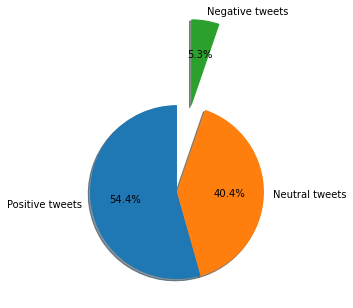

In [16]:

# Plotting the pie chart of the sentiments
import matplotlib.pyplot as plt
labels = 'Positive tweets', 'Neutral tweets', 'Negative tweets'
sizes = [df[df.Sentiment == 'Positive'].shape[0], df[df.Sentiment == 'Neutral'].shape[0], df[df.Sentiment == 'Negative'].shape[0]]
explode = (0, 0, 1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.show()

In [17]:
# Analyze one specific record
n=0
print('\nOriginal tweet:\n', df['Tweets'][n])
print('\nCleaned tweet:\n',  df['clean_tweet'][n])
print('\nSentiment:\n',      df['Sentiment'][n])


Original tweet:
 @TrendzAndDeals @Contest_in @ContestAlertIn1 @contestVshare @GiveawayGoat @IPL @mipaltan @RCBTweets MUMBAI INDIANS… https://t.co/22E7HCF0JN

Cleaned tweet:
 MUMBAI INDIANS

Sentiment:
 Neutral


In [18]:

# Analyze one specific record
n=5
print('\nOriginal tweet:\n', df['Tweets'][n])
print('\nCleaned tweet:\n',  df['clean_tweet'][n])
print('\nSentiment:\n',      df['Sentiment'][n])


Original tweet:
 @TrendzAndDeals @Contest_in @ContestAlertIn1 @contestVshare @GiveawayGoat @IPL @mipaltan @RCBTweets Mumbai Indians… https://t.co/xE2c5UAYOf

Cleaned tweet:
 Mumbai Indians

Sentiment:
 Neutral


In [19]:
# Storing the cleaned and analyzed data in the excel file
df.to_excel('{}.xlsx'.format('MI_tweets'))